In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.decomposition import PCA

In [27]:
train = pd.read_csv('../../2nd-Comp-Data/train.csv')
test = pd.read_csv('../../2nd-Comp-Data/test.csv')
testOriginal = pd.read_csv('../../2nd-Comp-Data/test.csv')

In [28]:
train.shape

(181507, 272)

In [29]:
test.drop('row ID', axis=1, inplace=True)
test.drop('sub_area', axis=1, inplace=True)

In [30]:
train.drop('sub_area', axis=1, inplace=True)

<h1>Categorical To Numerical<h1>

<h3>OneHot<h3>

In [31]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

<h3>Label<h3>

In [32]:
# categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
# print("Train: Categorical columns:", categorical_columns)

# label_encoder = LabelEncoder()

# for column in categorical_columns:
#     train[column] = label_encoder.fit_transform(train[column])

# categorical_columns_test = test.select_dtypes(include=['object']).columns.tolist()
# print("Test: Categorical columns:", categorical_columns_test)

# label_encoder = LabelEncoder()

# for column in categorical_columns_test:
#     test[column] = label_encoder.fit_transform(test[column])

<h1>Scaling<h1>

In [33]:
# def check_scaling_needed(dataframe, threshold=5):
#     """
#     Identify columns in a pandas DataFrame that may require scaling.

#     Parameters:
#     - dataframe: pandas DataFrame
#     - threshold: Range threshold to determine if a column requires scaling (default is 5)

#     Returns:
#     - List of tuples containing (column_name, range_value) for columns that may require scaling.
#     """
#     scaling_needed_columns = []

#     for column in dataframe.columns:
#         if dataframe[column].dtype in ['int64', 'float64']:
#             column_range = dataframe[column].max() - dataframe[column].min()
#             if column_range > threshold:
#                 scaling_needed_columns.append((column, column_range))

#     return scaling_needed_columns

# scaling_needed_columns = check_scaling_needed(train)

# if not scaling_needed_columns:
#     print("No columns require scaling.")
# else:
#     print("Columns that may require scaling:")
#     for column, column_range in scaling_needed_columns:
#         print(f"{column}: Range = {column_range}")


In [34]:
# scaling_needed_columns = check_scaling_needed(train)
# scaler = MinMaxScaler()

# for column, _ in scaling_needed_columns:
#     if train[column].dtype in ['int64', 'float64']:
#         train[column] = scaler.fit_transform(train[[column]])

<h1>Normalization<h1>

In [35]:
# def find_skewed_columns(dataframe, threshold=0.5):
#     """
#     Identify skewed columns in a pandas DataFrame.

#     Parameters:
#     - dataframe: pandas DataFrame
#     - threshold: Skewness threshold to determine if a column is skewed (default is 0.5)

#     Returns:
#     - List of tuples containing (column_name, skewness_value) for skewed columns.
#     """
#     skewed_columns = []
    
#     for column in dataframe.columns:
#         if dataframe[column].dtype in ['int64', 'float64']:
#             skewness = skew(dataframe[column])
#             if abs(skewness) > threshold:
#                 skewed_columns.append((column, skewness))
    
#     return skewed_columns

# skewed_columns = find_skewed_columns(train)

# if not skewed_columns:
#     print("No skewed columns found.")
# else:
#     print("Skewed columns:")
#     for column, skewness in skewed_columns:
#         print(f"{column}: Skewness = {skewness}")

In [36]:
# for column, _ in skewed_columns:
#     if train[column].dtype in ['int64', 'float64']:
#         train[column] = train[column].apply(lambda x: 1 if x == 0 else np.log(x))

<h1>Working<h1>

In [37]:
X = train.loc[:, train.columns != 'price_doc']
y = train[['price_doc']]

<h3>PCA<h3>

In [38]:
X.shape

(181507, 287)

In [39]:
test.shape

(77789, 287)

In [40]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X)
X2 = pd.DataFrame(data = principalComponents)

pca2 = PCA(n_components=7)
principalComponents = pca2.fit_transform(test)
test2 = pd.DataFrame(data = principalComponents)

Text(0, 0.5, 'cumulative explained variance')

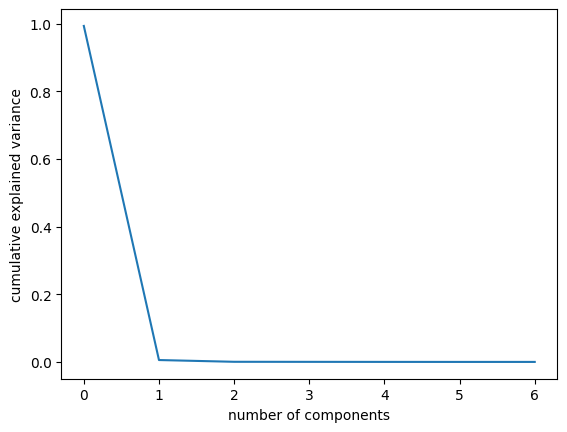

In [41]:
#plot an elbow graph to find the optimal number of components
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [42]:
# ols_reg = LinearRegression()
# sfs = SequentialFeatureSelector(ols_reg, direction='forward',n_features_to_select=5)
# sfs.fit(X, y)
# print(sfs.get_feature_names_out())

In [43]:
# X = X[['full_sq', 'mosque_count_500', 'leisure_count_500', 'cafe_count_1000_price_high', 'leisure_count_1000']]
# test = test[['full_sq', 'mosque_count_500', 'leisure_count_500', 'cafe_count_1000_price_high', 'leisure_count_1000']]

In [44]:
X2.shape

(181507, 7)

In [45]:
test2.shape

(77789, 7)

In [46]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [47]:
# reg2 = LinearRegression().fit(X_train, y_train)
# y_pred = reg2.predict(X_test)
# print("LR: R2 = %.4f and MSE = %.2f" % (reg2.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

In [48]:
# reg2 = LinearRegression().fit(X_train, y_train)
# y_pred = reg2.predict(X_test)
# print("LR: R2 = %.4f and MSE = %.2f" % (reg2.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

In [49]:
reg2 = LinearRegression().fit(X2, y)
y_pred = reg2.predict(test2)

In [50]:
result_df = pd.DataFrame({'row ID': testOriginal['row ID'], 'price_doc': y_pred.flatten()})
result_df.to_csv('Day2.4.csv', index=False)